# "MJ is the GOAT, and Kobe is the remix" - Jalen Rose
2020 has been a tough year around the world, the tragedy of losing one of the basketball great, the deathly COVID-19, police brutality and social injustice. It would be easy to say this year took a toll on the general publics. 
Since the NBA restart is coming up this week, I would like use this time to make a tribute to one of my favorite basketball players growing up and take my mind out of the depressing matter in the world.  


In [4]:
#Import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers as mrks
import seaborn as sns
# orginal draw_court code was created by Savvas Tjortjoglou, 
# please refer  http ://savvastjortjoglou.com/nba-shot-sharts.html for reference
import draw_court as outline

In [5]:
kobe_df = pd.read_csv('C:/Users/han/Documents/kobe/data.csv')  #Kaggle Kobe Bryant shot Sellection competition data set
kobe_df['game_date'] = pd.to_datetime(kobe_df['game_date'] )
#str(np.array(kobe_df.columns))
print( 'The column names are {}, \n and the dataframe contains {} rows and {} columns'.format(
    str(np.array(kobe_df.columns)), kobe_df.shape[0], kobe_df.shape[1]))
kobe_df.head()

The column names are ['action_type' 'combined_shot_type' 'game_event_id' 'game_id' 'lat'
 'loc_x' 'loc_y' 'lon' 'minutes_remaining' 'period' 'playoffs' 'season'
 'seconds_remaining' 'shot_distance' 'shot_made_flag' 'shot_type'
 'shot_zone_area' 'shot_zone_basic' 'shot_zone_range' 'team_id'
 'team_name' 'game_date' 'matchup' 'opponent' 'shot_id'], 
 and the dataframe contains 30697 rows and 25 columns


,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


# Career Accuracy

In [6]:
#using group by to get the number of shots per season, and per playoff
career_acc_df= kobe_df.groupby(['season','playoffs','shot_made_flag']).size().reset_index(name='size')
career_acc_df['cumsum']  =career_acc_df.groupby(['season','playoffs'])['size'].transform('cumsum')
#create shot_accurcy 
career_acc_df['shot_accuracy'] = career_acc_df['size'] / career_acc_df['cumsum']
career_acc_df=career_acc_df[career_acc_df['shot_made_flag']==1].reset_index()
career_acc_df.head()
#career_acc_df[career_acc_df.playoffs ==1][8:]

,index,season,playoffs,shot_made_flag,size,cumsum,shot_accuracy
0,1,1996-97,0,1.0,145,339,0.427729
1,3,1996-97,1,1.0,17,44,0.386364
2,5,1997-98,0,1.0,328,754,0.435013
3,7,1997-98,1,1.0,21,56,0.375000
4,9,1998-99,0,1.0,299,646,0.462848


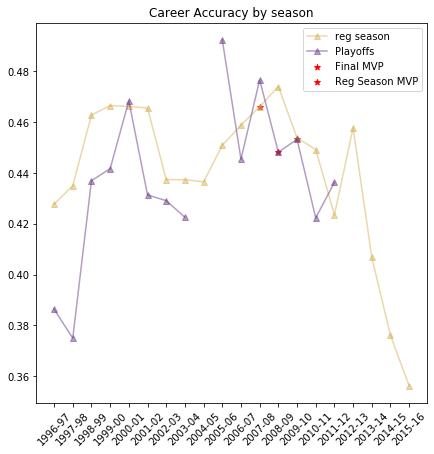

In [7]:
plt.figure(figsize=(7,7))
plt.plot(career_acc_df[career_acc_df['playoffs']==0]['season'],
           career_acc_df[career_acc_df['playoffs']==0]['shot_accuracy'],
             marker= '^',c='#d8b055',alpha = 0.5, label='reg season')
plt.plot(career_acc_df[career_acc_df['playoffs']==1]['season'][0:8],
           career_acc_df[career_acc_df['playoffs']==1]['shot_accuracy'][0:8], 
             marker= '^',c='#6a3a89',alpha = 0.5, label='Playoffs')
plt.plot(career_acc_df[career_acc_df['playoffs']==1]['season'][8:],
           career_acc_df[career_acc_df['playoffs']==1]['shot_accuracy'][8:] , 
             marker= '^',c='#6a3a89', alpha =0.5)
plt.scatter(career_acc_df[(career_acc_df.season.isin(['2008-09','2009-10'])) & (career_acc_df.playoffs==1)].season, 
            career_acc_df[(career_acc_df.season.isin(['2008-09','2009-10'])) & (career_acc_df.playoffs==1)].shot_accuracy,
            marker='*', c='red', label='Final MVP')
plt.scatter(career_acc_df[(career_acc_df.season =='2007-08') & (career_acc_df.playoffs==0)].season, 
            career_acc_df[(career_acc_df.season =='2007-08')& (career_acc_df.playoffs==0)].shot_accuracy,
            marker='*', c='red', label='Reg Season MVP')
plt.legend()
plt.title('Career Accuracy by season')
plt.xticks(rotation=45)
plt.show()

First, let us take a look at Kobe’s shot accuracy over the course of his career. From the graph we see kobe's shot accuracy had a major dip between playoff and the regular season at beginning of his career. The defense intensity tends to be higher in the playoff, majority of the players have to adjust the style of the play when they first come into the league. Kobe quickly adjusted to the playoff intsensity after year 3. In the end, we see Kobe's accuracy stays above 40 % throughout his career. 

# Shot Postions

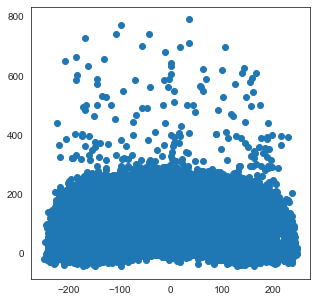

In [8]:
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(5,5))
plt.scatter(kobe_df.loc_x, kobe_df.loc_y)
plt.show()

Using seaborn package, we are getting a clutter scatter plot on the figure and the graph is not very useful. Thru my research from different sites, there are a lot of references online could enhance the visualization.  I was able to use http ://savvastjortjoglou.com/nba-shot-sharts.html as a reference for my visual analysis, Savvas Tjortjoglou had a detailed explanation on how the codes were created and other NBA visualizations as well.

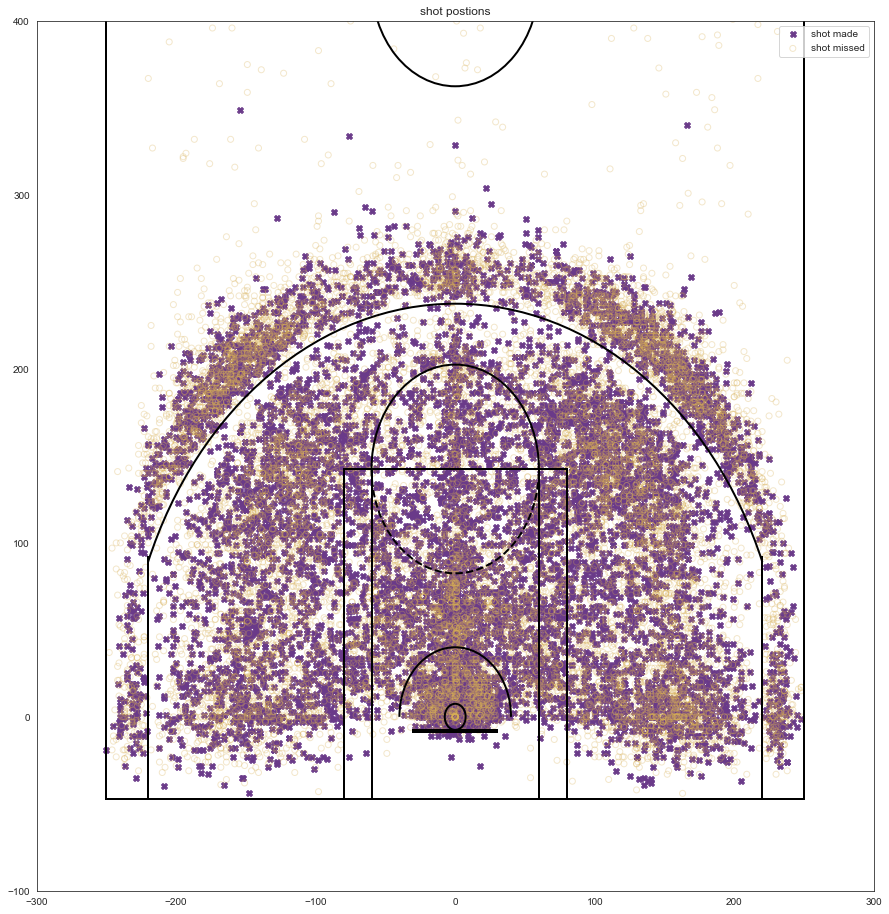

In [9]:
plt.figure(figsize=(15,16))
plt.scatter(kobe_df[kobe_df['shot_made_flag']==1].loc_x, kobe_df[kobe_df['shot_made_flag']==1].loc_y, 
            marker= 'X', c='#6a3a89', alpha =1 ,label='shot made' )
o=mrks.MarkerStyle(marker='o', fillstyle='none')
plt.scatter(kobe_df[kobe_df['shot_made_flag']==0].loc_x, kobe_df[kobe_df['shot_made_flag']==0].loc_y, 
            marker= o, edgecolors='#d8b055', color = 'none', alpha=0.3, label='shot missed')
outline.draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,400)
plt.title('shot postions')
plt.legend(loc='upper right')
plt.show()

The above graph is a shot chart containing all 30,697 shots that Kobe took from 1996-2016, separating his makes from his misses. As we can see from the graph, Kobe scored everywhere on the court, some made baskets even came from behind the basket or at an angle which were pretty impossible to make. 

# MSG the MECA and Staple center's homecourt advantage

In [10]:
'''creating the game_location column based from the match up column'''
kobe_df.opponent.unique()
kobe_df.matchup.unique()
#kobe_df['Location']=kobe_df.matchup.str[-3:] if (kobe_df.matchup.str.contains('@')).any() else kobe_df.matchup.str[0:3] 
kobe_df['game_location']=np.where(kobe_df.matchup.str.contains("@"),kobe_df.opponent, kobe_df.matchup.str[0:3] )
kobe_df[['matchup', 'game_location']].head()  #sainty check 
#x=list(kobe_df.game_location.unique())
#x.sort()


,matchup,game_location
0,LAL @ POR,POR
1,LAL @ POR,POR
2,LAL @ POR,POR
3,LAL @ POR,POR
4,LAL @ POR,POR


In [11]:
team_acc_df= kobe_df.groupby(['game_location','shot_made_flag']).size().reset_index(name='size')
team_acc_df['total_shots']  =team_acc_df.groupby('game_location')['size'].transform('cumsum')
team_acc_df['shot_accuracy'] = team_acc_df['size'] / team_acc_df['total_shots']
team_acc_df=team_acc_df[team_acc_df['shot_made_flag']==1].reset_index()
#career_acc_df[career_acc_df.season=='2004-05']
#team_acc_df

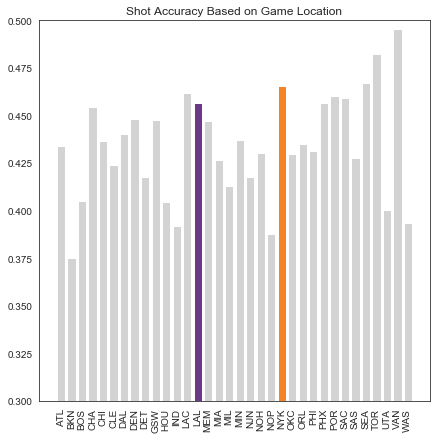

In [12]:
plt.figure(figsize=(7,7))
"""plt.bar(team_acc_df.game_location, team_acc_df.shot_accuracy, 
        color =('#efdfbb', '#ecd8ab','#e8d09b','#e4c98b', '#e1c17c','#ddba6c','#d9b35c','#d8b055', '#d2a43c'
                ,'#c4acdc', '#b29ed6',  '#a790d0', '#9c82ca', '#9174c4', '#8667be', '#7b59b9', '#814cb2'
                ,'#7746a5','#6d4097','#6a3a89' ))"""
plt.bar(team_acc_df.game_location, team_acc_df.shot_accuracy, color='#D3D3D3')
plt.bar(team_acc_df[team_acc_df.game_location.isin(['NYK', 'LAL'])].game_location, 
          team_acc_df[team_acc_df.game_location.isin(['NYK', 'LAL'])].shot_accuracy, 
    color = ('#6a3a89', "#f58426"))
plt.xticks(rotation=90)
plt.title('Shot Accuracy Based on Game Location')
plt.ylim(0.3, 0.5)
plt.show()

There is a saying in the NBA media, NBA superstars shine in Madison Square Garden. The big apple tends to have the most national media coverage and the superstars see MSG as a challenge to put up the best performance against the knickerbockers. Ironically Kobe’s accuracy when the games were played in Madison Square Garden consider as his top 3 career accuracy against any given team, his accuracy were even slightly higher when the games were played in the staple center where is the homecourt for LA Lakers.  

# being Clutch

In [13]:
shots_per_period=kobe_df.groupby(['period', 'shot_made_flag']).size().reset_index(name='shots')
shots_per_period.loc[shots_per_period.period>4, 'period']='OT'
shots_per_period= shots_per_period.groupby(['period', 'shot_made_flag']).agg({'shots':'sum'}).reset_index()
shots_per_period['total_shots'] = shots_per_period.groupby('period')['shots'].transform('cumsum')
shots_per_period['shot_accuracy'] = shots_per_period['shots'] / shots_per_period['total_shots']
shots_per_period=shots_per_period[shots_per_period['shot_made_flag']==1].reset_index()
shots_per_period

,index,period,shot_made_flag,shots,total_shots,shot_accuracy
0,1,1,1.0,3120,6700,0.465672
1,3,2,1.0,2529,5635,0.448802
2,5,3,1.0,3175,7002,0.453442
3,7,4,1.0,2500,6043,0.413702
4,9,OT,1.0,141,317,0.444795


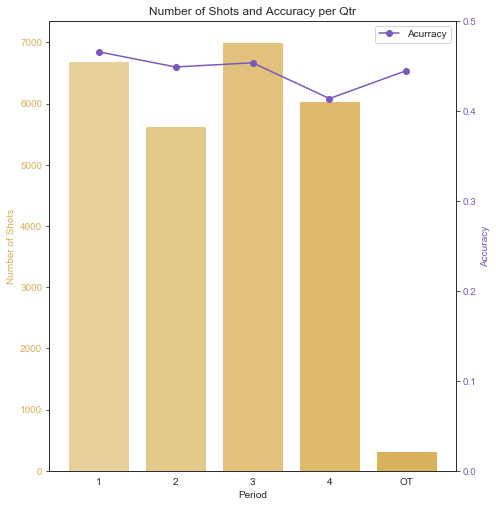

In [22]:
fig, ax1=plt.subplots(1,1,figsize=(7,7))
ax1.set_xlabel('Period')
ax1.set_ylabel('Number of Shots', color='#d8b055')


ax1.bar(shots_per_period.index,shots_per_period.total_shots
        , color=('#e8d09b','#e4c98b', '#e1c17c','#ddba6c','#d9b35c'))
#ax1.xticks(shots_per_period_df.index,labels)
ax1.tick_params(axis='y', labelcolor='#d8b055')
ax1.tick_params(axis='x')
plt.xticks(shots_per_period.index,['1','2','3','4','OT'])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Accuracy', color='#7b59b9')  # we already handled the x-label with ax1
ax2.plot(shots_per_period.index,shots_per_period.shot_accuracy, color='#7b59b9', 
        marker = 'o',label='Acurracy')
ax2.tick_params(axis='y', labelcolor='#7b59b9')
ax2.set_ylim(bottom=0, top= 0.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Number of Shots and Accuracy per Qtr')
plt.legend(loc='upper right')
plt.show()

In [19]:
l3min_df=kobe_df[kobe_df.minutes_remaining<=3]
l3min_df=l3min_df.groupby(['period', 'minutes_remaining', 'shot_made_flag']).size().reset_index(name='shots')

l3min_df.loc[l3min_df.period>4, 'period']='OT'
l3min_df=l3min_df.groupby(['period', 'minutes_remaining', 'shot_made_flag']).agg({'shots':'sum'}).reset_index()
l3min_df['total_shots'] = l3min_df.groupby(['period', 'minutes_remaining'])['shots'].transform('cumsum')
l3min_df['accuracy']= l3min_df['shots']/l3min_df['total_shots']
l3min_df=l3min_df[l3min_df.shot_made_flag == 1]
l3min_df=l3min_df.sort_values(by= ['period', 'minutes_remaining'],  ascending=[True, False]).reset_index()

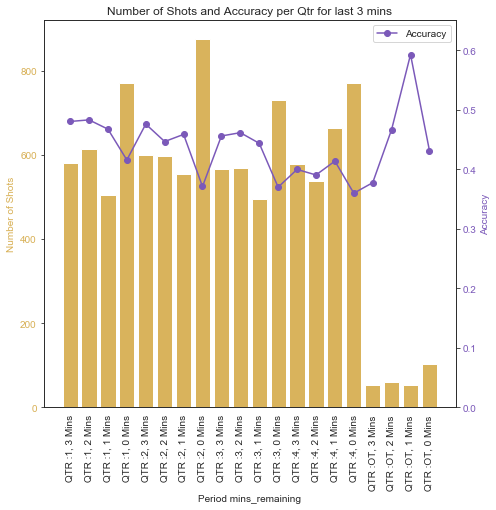

In [20]:
fig, ax1=plt.subplots(1,1,figsize=(7,7))
ax1.set_xlabel('Period mins_remaining')
ax1.set_ylabel('Number of Shots', color='#d8b055')

ax1.bar(l3min_df.index,l3min_df.total_shots
        , color='#d9b35c')
ax1.tick_params(axis='y', labelcolor='#d8b055')
ax1.tick_params(axis='x')

xtick=[] #create x tick 
for x , y in np.array(l3min_df[['period', 'minutes_remaining']]):
    xtick.append ('QTR :'+str(x) +', '+ str(y) +' Mins')
    
plt.xticks(l3min_df.index,xtick)
plt.xticks(rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim( top= 0.65)

ax2.set_ylabel('Accuracy', color='#7b59b9')  # we already handled the x-label with ax1
ax2.plot(l3min_df.index,l3min_df.accuracy, color='#7b59b9', label='Accuracy', marker= 'o')
ax2.tick_params(axis='y', labelcolor='#7b59b9')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Number of Shots and Accuracy per Qtr for last 3 mins')
plt.legend(loc='upper right')
plt.show()

When looking at Kobe’s shots distribution, we see Kobe has a high volume of shooting numbers but with a downward trend on accuracy. The numbers and graphs have shown Kobe’s 4th quarter ranked as the lowest accuracy among all periods. Some critics may even question if Kobe’s clutch performance purely judged by the public perceptions. As we know, accuracy is calculated as number of shots made over the number of shots taken; when the same number of the shots made, the more shots taken would decrease the accuracy. Even with the lowest accuracy at 41.7% in the 4th quarter, the coaches still had the faith to place the ball on Kobe’s hand when the games are on the line. Furthermore, looking at the last 3 minutes within each quarter, when the games at overtime within one minute remains, his overall accuracy is close to 60%. Some may argue that 40% is not a high success rate, but when the pressures are on and the game are on the line, everyone would rather have this future hall of famer to be on their side. 